In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import numpy as np
import os
print(os.getcwd())

/home/cys/Desktop/kinetics_proj/metabolic_labeling


In [2]:
adata_sckinetics = sc.read('./sceu_organoid_hires.h5ad')
adata_deepkinet = sc.read('./deepkinet_organoid.h5ad')
adata_deepvelo = sc.read('./deepvelo_organoid.h5ad')

In [3]:
adata_sckinetics

AnnData object with n_obs × n_vars = 3500 × 2000
    obs: 'well_id', 'batch_id', 'treatment_id', 'log10_gfp', 'rotated_umap1', 'rotated_umap2', 'som_cluster_id', 'monocle_branch_id', 'monocle_pseudotime', 'exp_type', 'time', 'labeling_time', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'unitvelo_time'
    var: 'ID', 'NAME', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'alpha', 'beta', 'gamma', 'spliced', 'spliced_velocity', 'unspliced', 'unspliced_velocity'
    obsp: 'connectivities', 'distances'

In [4]:
# adata_sckinetics.obs['rotated_umap1'] = [float(i) for i in adata_sckinetics.obs['rotated_umap1']]
# adata_sckinetics.obs['rotated_umap2'] = [float(i) for i in adata_sckinetics.obs['rotated_umap2']]

In [5]:
# adata_sckinetics.obsm['X_umap'] = np.concatenate((adata_sckinetics.obs['rotated_umap1'].values.reshape(-1,1),adata_sckinetics.obs['rotated_umap2'].values.reshape(-1,1)),axis=1)

In [6]:
adata_deepkinet.obsm['X_umap'] = adata_sckinetics.obsm['X_umap']
adata_deepvelo.obsm['X_umap'] = adata_sckinetics.obsm['X_umap']

computing velocity graph (using 1/16 cores)
    finished (0:00:20) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_organoid_sckinetics_velocity.svg


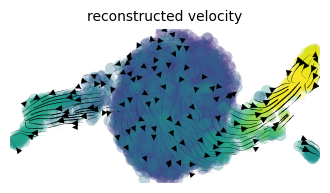

In [9]:
scv.tl.velocity_graph(adata_sckinetics, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(adata_sckinetics, vkey='spliced_velocity', 
                                 color_map='viridis', colorbar=False,
                                 title='reconstructed velocity',
                                 linewidth=0.5,
                                 figsize=(4,2),
                                 save='organoid_sckinetics_velocity.svg',
                                 basis='umap',c='unitvelo_time')

computing velocity graph (using 1/16 cores)
    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_organoid_deepvelo_velocity.svg


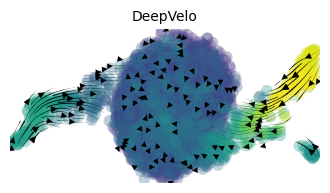

In [10]:
scv.tl.velocity_graph(adata_deepvelo, vkey='velocity')
adata_deepvelo.obs['unitvelo_time'] = adata_sckinetics.obs['unitvelo_time']
scv.pl.velocity_embedding_stream(adata_deepvelo, vkey='velocity', 
                                 color_map='viridis', colorbar=False,
                                 title='DeepVelo',
                                 linewidth=0.5,
                                 figsize=(4,2),
                                 save='organoid_deepvelo_velocity.svg',
                                 basis='umap',c='unitvelo_time')

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/16 cores)
    finished (0:00:19) --> added 
    'DeepKINET_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'DeepKINET_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_organoid_deepkinet_velocity.svg


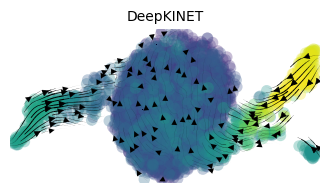

In [11]:
scv.tl.velocity_graph(adata_deepkinet, vkey='DeepKINET_velocity')
adata_deepkinet.obs['unitvelo_time'] = adata_sckinetics.obs['unitvelo_time']
scv.pl.velocity_embedding_stream(adata_deepkinet, vkey='DeepKINET_velocity', 
                                 color_map='viridis', colorbar=False,
                                 title='DeepKINET',
                                 figsize=(4,2),
                                 linewidth=0.5,
                                 save='organoid_deepkinet_velocity.svg',
                                 basis='umap',c='unitvelo_time')

In [12]:
cd_velocity = pd.read_csv('../celldancer/organoid_spliced_velocity.csv',index_col=0)

In [13]:
genes = cd_velocity.columns.intersection(adata_deepkinet.var.index)
print(len(genes))
cd_velocity = cd_velocity[genes]

1999


In [14]:
adata_deepkinet = adata_deepkinet[:,genes].copy()

In [15]:
adata_deepkinet.layers['celldancer_velocity'] = cd_velocity.values

computing velocity graph (using 1/16 cores)
    finished (0:00:19) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_organoid_celldancer_velocity.svg


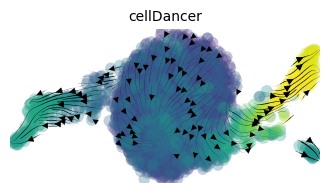

In [16]:
scv.tl.velocity_graph(adata_deepkinet, vkey='celldancer_velocity')
scv.pl.velocity_embedding_stream(adata_deepkinet, vkey='celldancer_velocity', 
                                 color_map='viridis', colorbar=False,
                                 title='cellDancer',
                                 figsize=(4,2),
                                 linewidth=0.5,
                                 save='organoid_celldancer_velocity.svg',
                                 basis='umap',c='unitvelo_time')